In [10]:
!pip3 install beautifulsoup4
!pip3 install requests

In [3]:

import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [4]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    

In [5]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [6]:
response = requests.get(static_url).text

In [7]:
soup = BeautifulSoup(response, 'html.parser')

In [8]:
print(soup.title)

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>


In [ ]:
html_tables = soup.find_all("table")
print(html_tables)

In [10]:
table = html_tables[2]

# Find all th elements (table header cells) in the table
column_names = table.find_all("th")

# Print the text content of the th elements
for column in column_names:
    print(column.get_text())

Flight No.

Date andtime (UTC)

Version,Booster [b]

Launch site

Payload[c]

Payload mass

Orbit

Customer

Launchoutcome

Boosterlanding

1

2

3

4

5

6

7



In [12]:
column_names = []

# Apply find_all() function with `th` element on first_launch_table
# Iterate each th element and apply the provided extract_column_from_header() to get a column name
# Append the Non-empty column name (`if name is not None and len(name) > 0`) into a list called column_names
temp = soup.find_all('th')
for x in range(len(temp)):
    try:
     name = extract_column_from_header(temp[x])
     if (name is not None and len(name) > 0):
        column_names.append(name) 
    except:
     pass

In [ ]:
print(column_names)

In [13]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column


# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [16]:
extracted_row = 0
#Extract each table 
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row 
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number 
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element 
        row=rows.find_all('td')
        #if it is number save cells in a dictonary 
        if flag:
            extracted_row += 1
            # Flight Number value
      
            launch_dict["Flight No."].append(flight_number)

            datatimelist=date_time(row[0])
            # Date value
        
            date = datatimelist[0].strip(',')
            launch_dict["Date"].append(date)
    
            
            # Time value
        
            time = datatimelist[1]
            launch_dict["Time"].append(time)

              
            # Booster version

            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
            launch_dict["Version Booster"].append(bv)
 
            
            # Launch Site
       
            launch_site = row[2].a.string
            launch_dict["Launch site"].append(launch_site)

            
            # Payload
  
            payload = row[3].a.string
            launch_dict["Payload"].append(payload)

            
            # Payload Mass
         
            payload_mass = get_mass(row[4])
            launch_dict["Payload mass"].append(payload_mass)
  
            
            # Orbit

            orbit = row[5].a.string
            launch_dict["Orbit"].append(orbit)
            
            # Customer
       
            customer = row[6].a.string
            launch_dict["Customer"].append(customer)

            # Launch outcome
       
            launch_outcome = list(row[7].strings)[0]
            launch_dict["Launch outcome"].append(launch_outcome)

            
            # Booster landing
        
            booster_landing = landing_status(row[8])
            launch_dict["Booster landing"].append(booster_landing)

AttributeError: 'NoneType' object has no attribute 'string'

In [18]:
headings = []
for key,values in dict(launch_dict).items():
    if key not in headings:
        headings.append(key)
    if values is None:
        del launch_dict[key]

def pad_dict_list(dict_list, padel):
    lmax = 0
    for lname in dict_list.keys():
        lmax = max(lmax, len(dict_list[lname]))
    for lname in dict_list.keys():
        ll = len(dict_list[lname])
        if  ll < lmax:
            dict_list[lname] += [padel] * (lmax - ll)
    return dict_list

pad_dict_list(launch_dict,0)

df = pd.DataFrame.from_dict(launch_dict)
df.head()

,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Version Booster,Booster landing,Date,Time
0,1,CCAFS,Dragon Spacecraft Qualification Unit,0,LEO,<generator object Tag._all_strings at 0x000001...,Success\n,F9 v1.0B0003.1,Failure,4 June 2010,18:45
1,2,CCAFS,Dragon,0,LEO,<generator object Tag._all_strings at 0x000001...,Success,F9 v1.0B0004.1,Failure,8 December 2010,15:43
2,3,CCAFS,Dragon,525 kg,LEO,<generator object Tag._all_strings at 0x000001...,Success,F9 v1.0B0005.1,No attempt\n,22 May 2012,07:44
3,4,CCAFS,SpaceX CRS-1,"4,700 kg",LEO,<generator object Tag._all_strings at 0x000001...,Success\n,F9 v1.0B0006.1,No attempt,8 October 2012,00:35
4,5,CCAFS,SpaceX CRS-2,"4,877 kg",LEO,<generator object Tag._all_strings at 0x000001...,Success\n,F9 v1.0B0007.1,No attempt\n,1 March 2013,15:10


In [19]:
df.to_csv('spacex_web_scraped.csv', index=False)

In [24]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


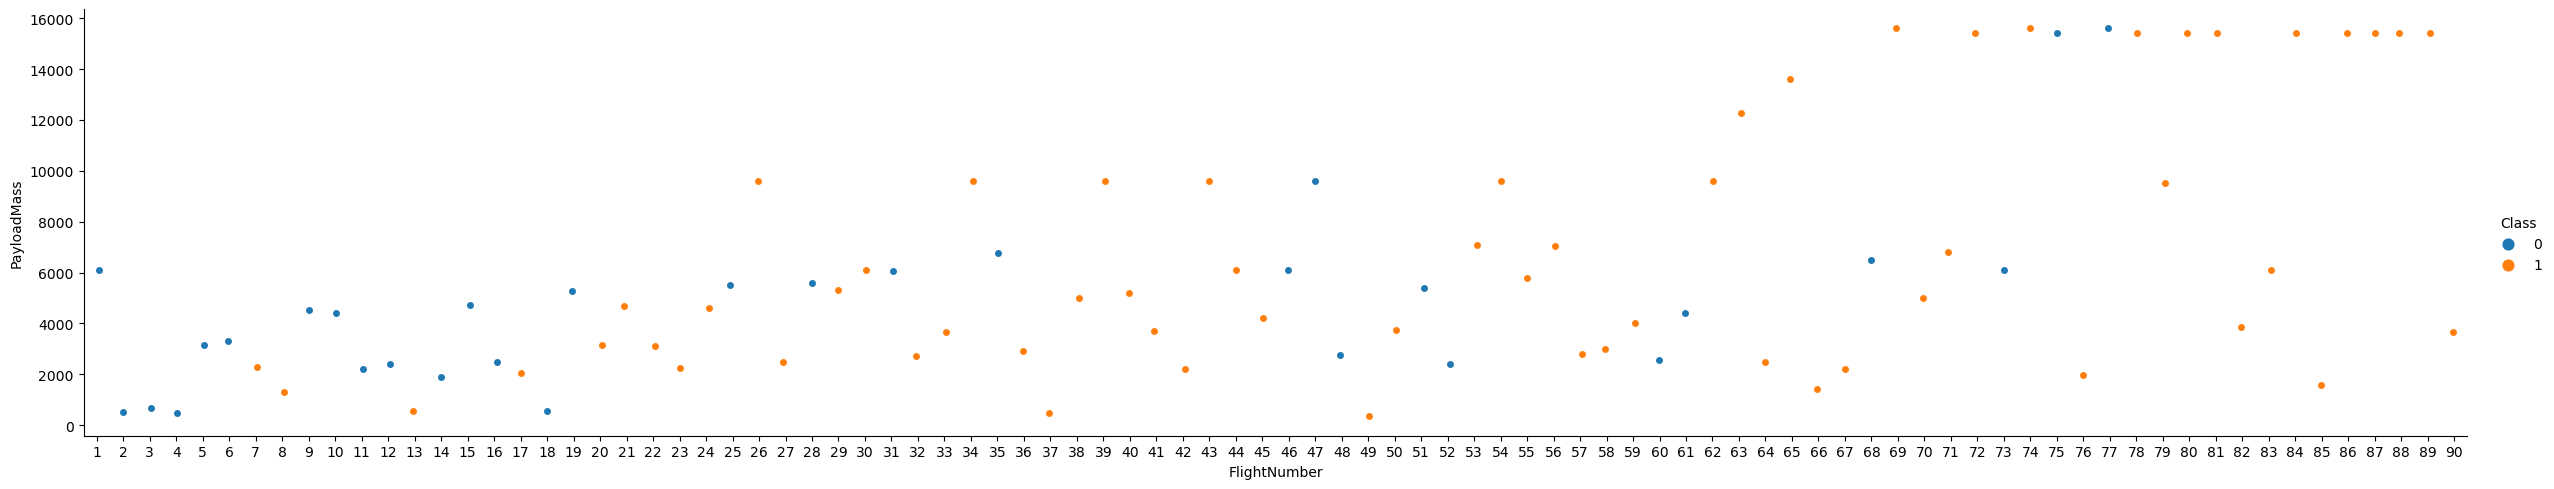

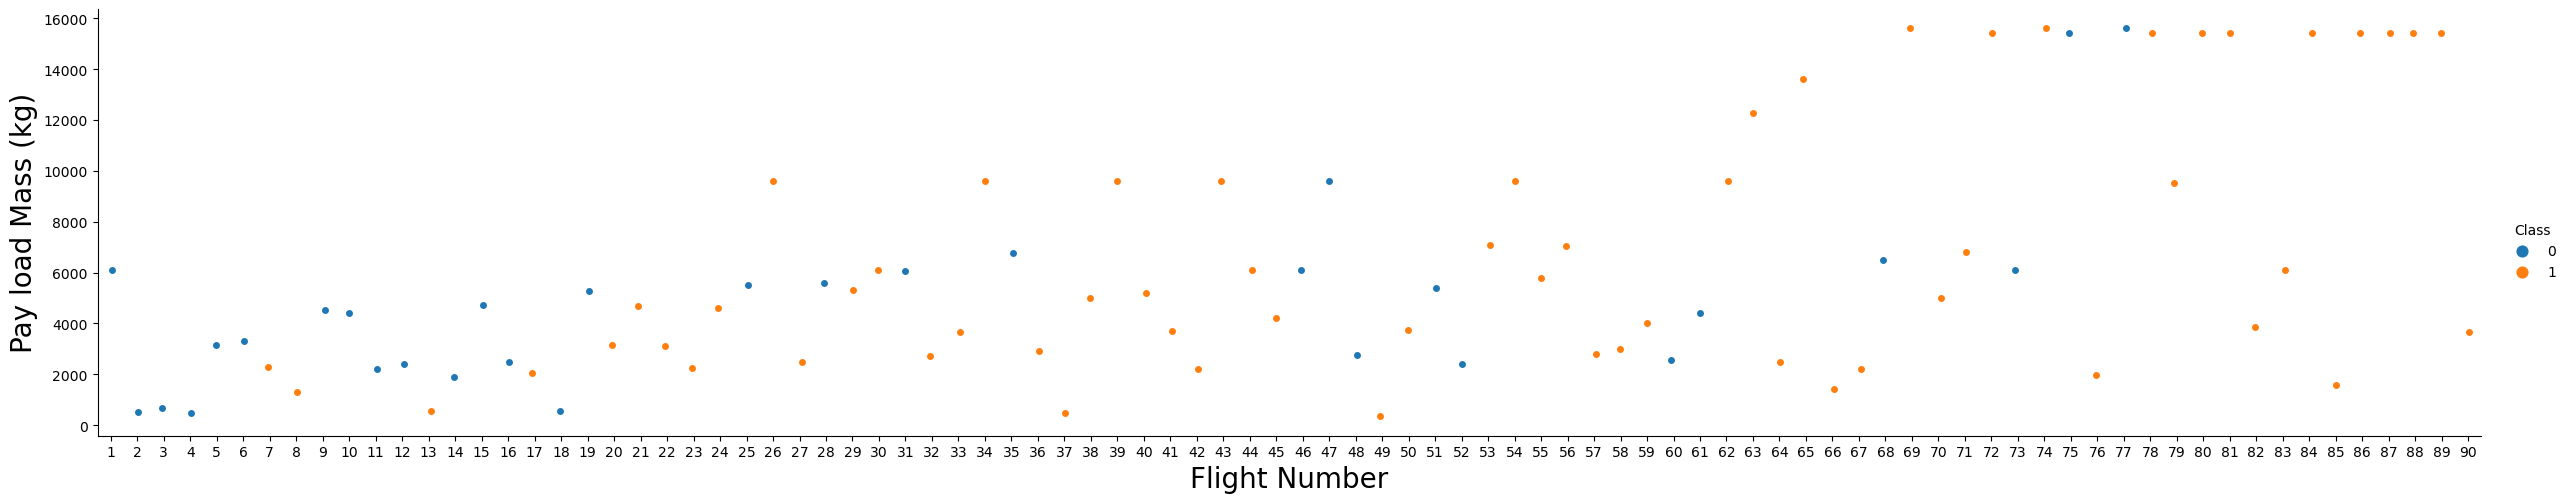

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

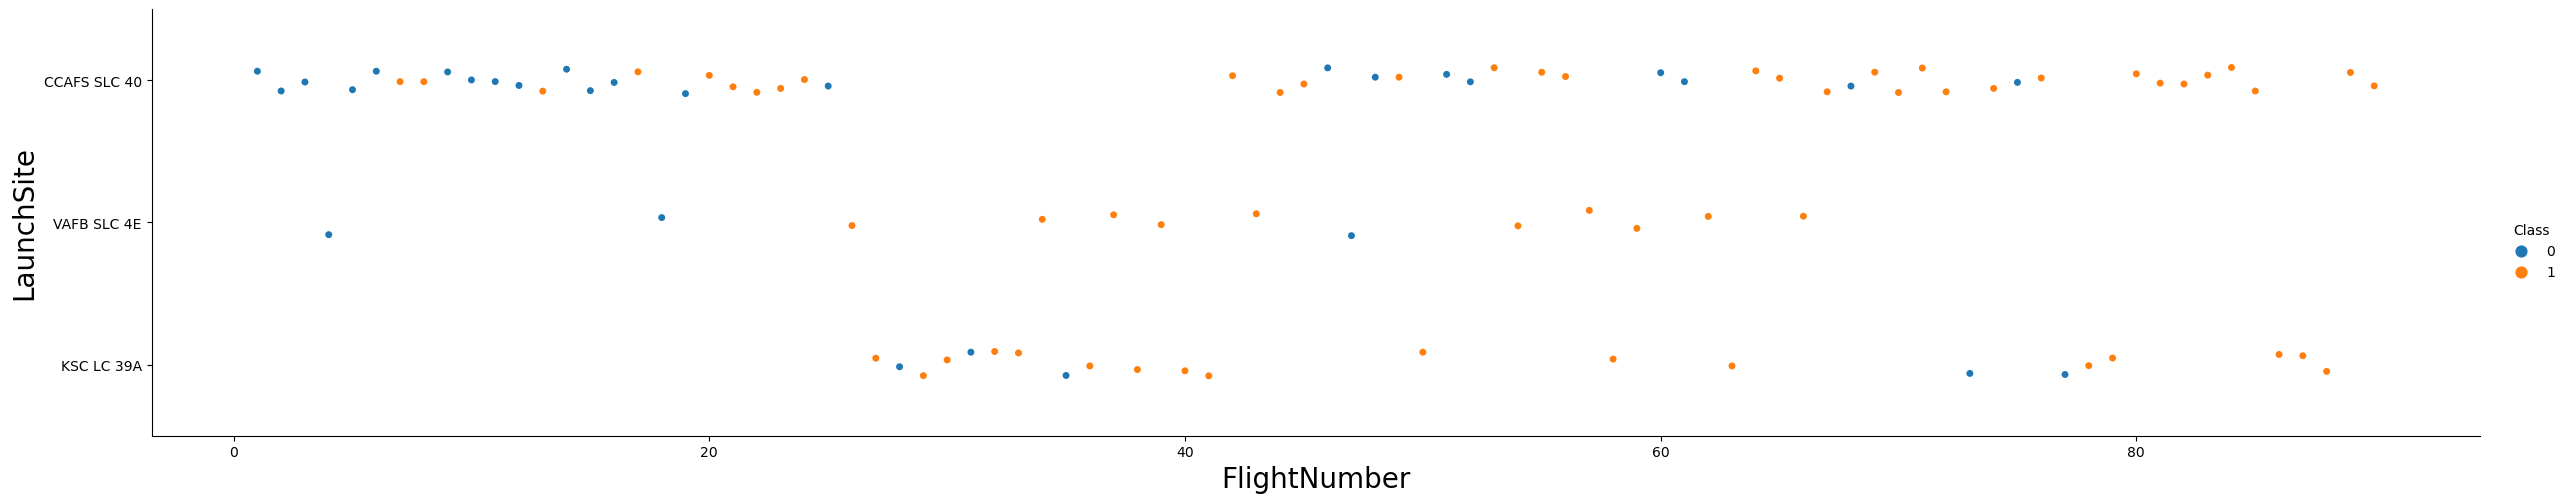

In [34]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect = 5)

plt.xlabel("FlightNumber", fontsize = 20)
plt.ylabel("LaunchSite",fontsize = 20)
plt.show()

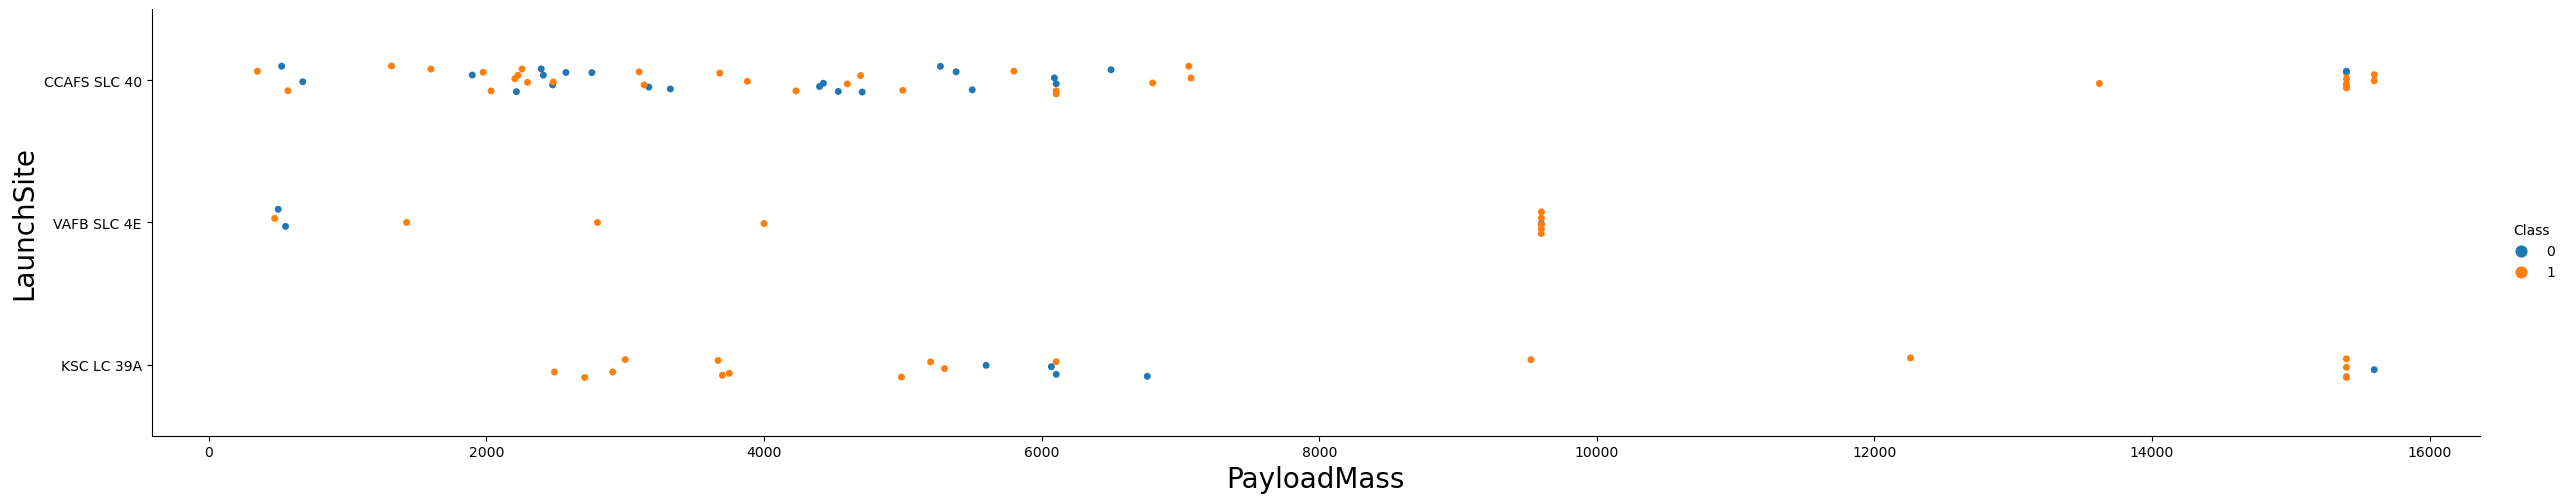

In [35]:
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect = 5)

plt.xlabel("PayloadMass", fontsize = 20)
plt.ylabel("LaunchSite",fontsize = 20)
plt.show()

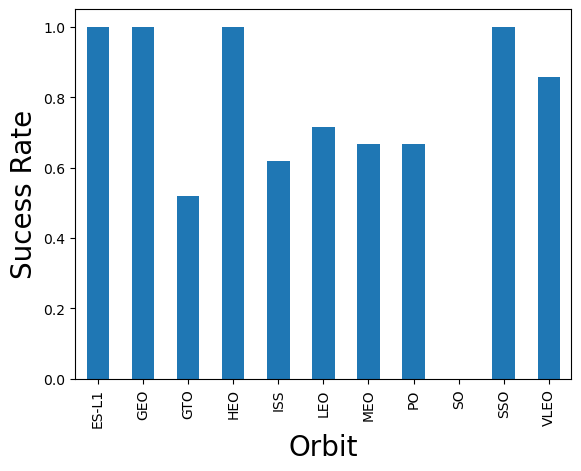

In [36]:
df.groupby(['Orbit']).mean()['Class'].plot(kind='bar')
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Sucess Rate",fontsize=20)
plt.show()

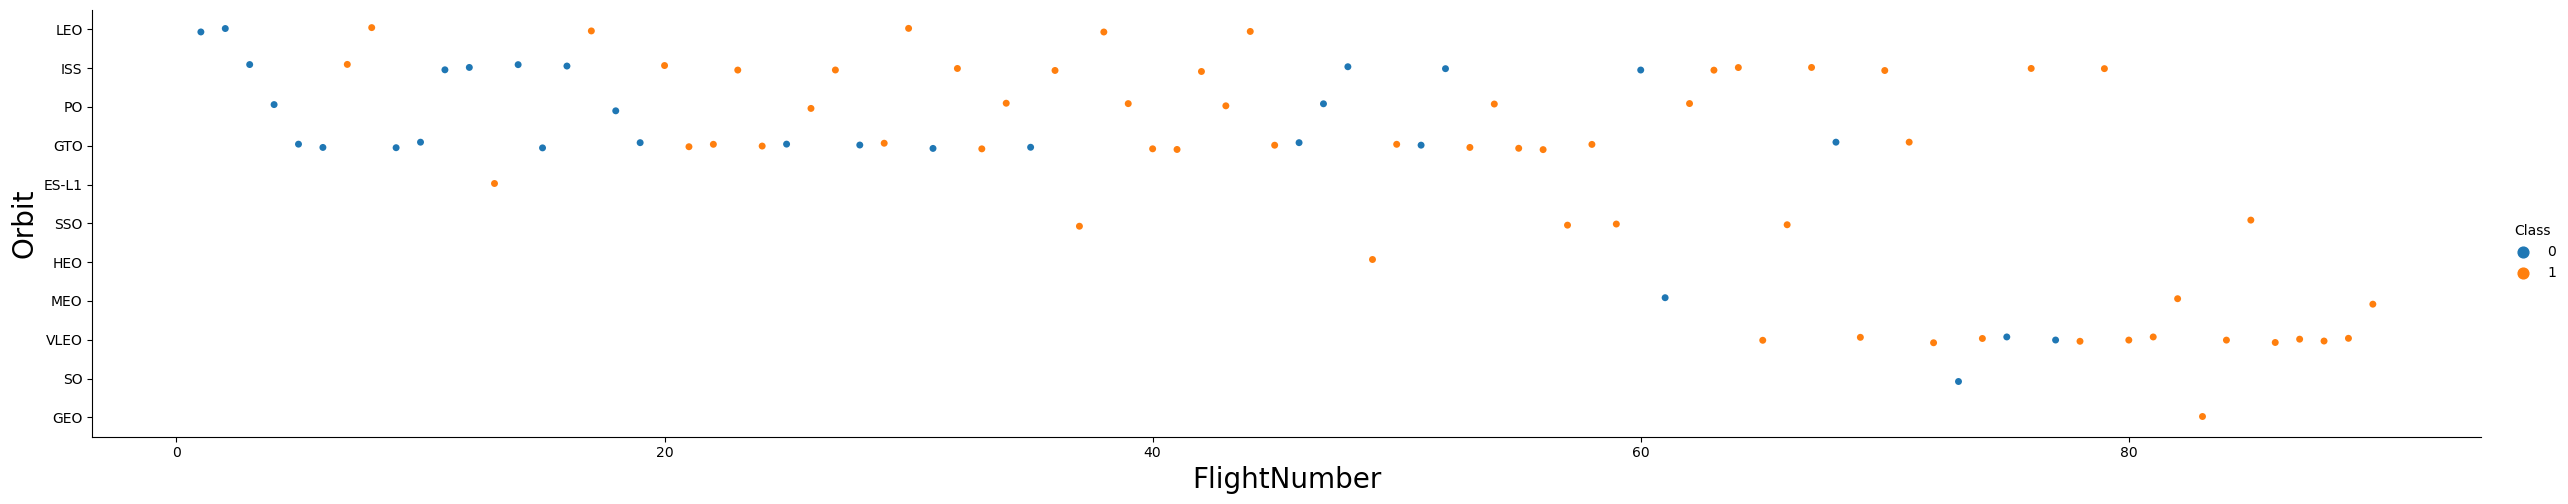

In [37]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect = 5)

plt.xlabel("FlightNumber", fontsize = 20)
plt.ylabel("Orbit",fontsize = 20)
plt.show()

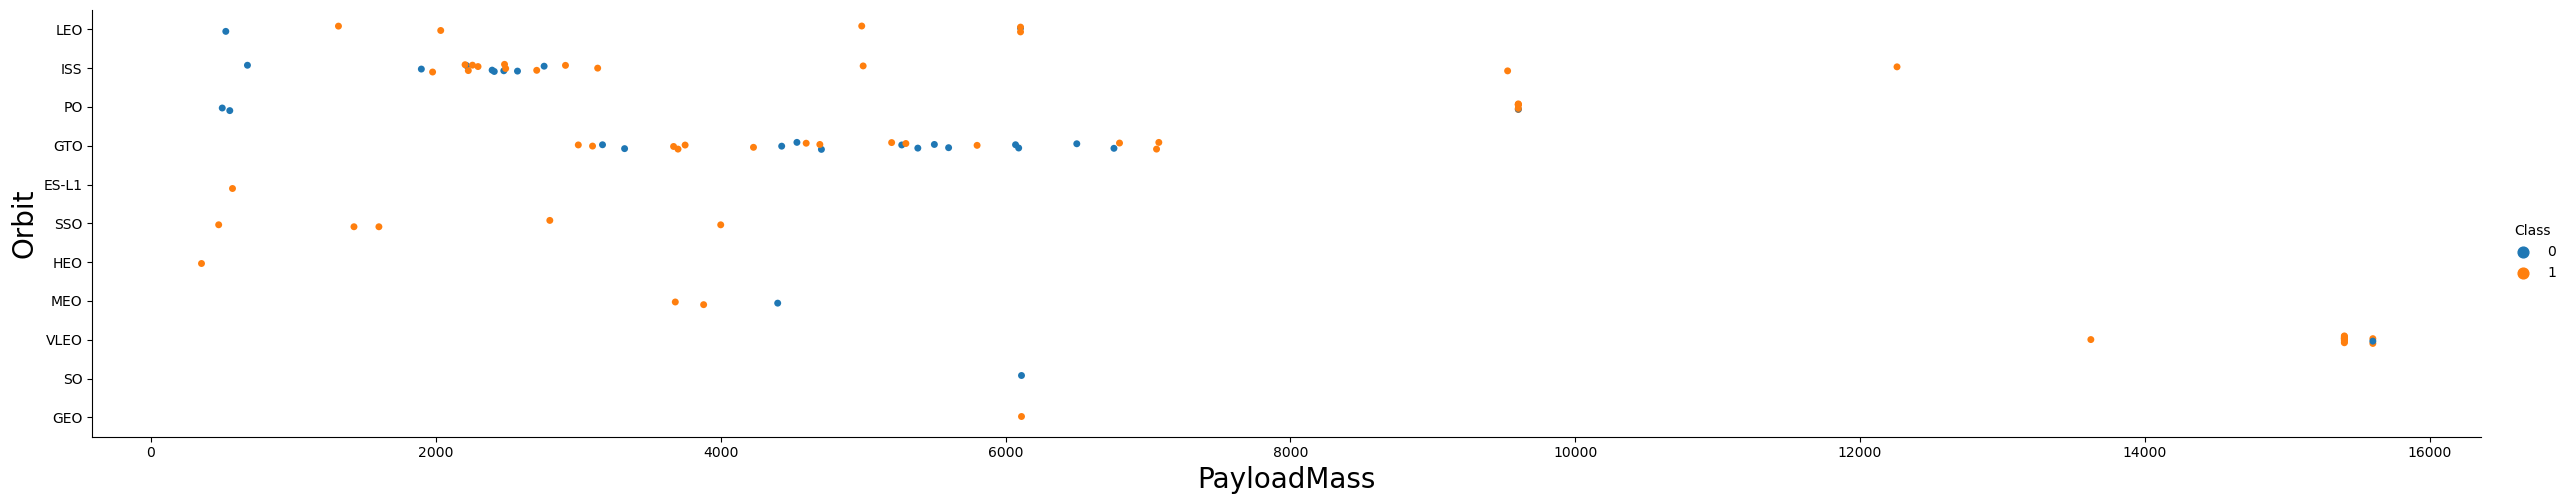

In [38]:
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect = 5)

plt.xlabel("PayloadMass", fontsize = 20)
plt.ylabel("Orbit",fontsize = 20)
plt.show()

In [39]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

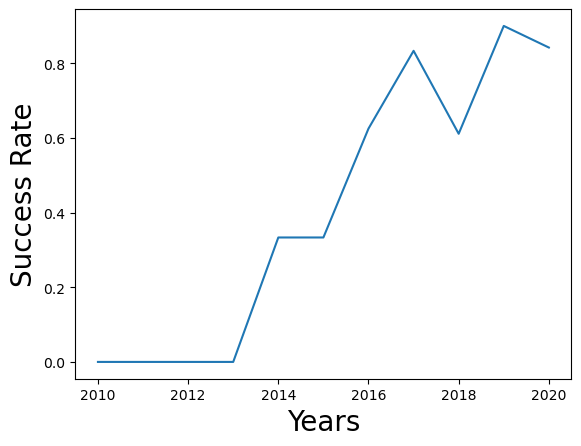

In [42]:
df['Year'] = pd.DataFrame(Extract_year(df['Date'])).astype('int')
sns.lineplot(x = df['Year'].unique() , y = df.groupby(['Year'])['Class'].mean()) 
plt.xlabel("Years",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

In [43]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [44]:
features_one_hot = pd.get_dummies(features, columns=['Orbit','LaunchSite','LandingPad','Serial','GridFins','Reused','Legs'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1,6104.959412,1,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,2,525.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
2,3,677.000000,1,1.0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
3,4,500.000000,1,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,5,3170.000000,1,1.0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0


In [45]:
features_one_hot.astype('float64').dtypes

FlightNumber     float64
PayloadMass      float64
Flights          float64
Block            float64
ReusedCount      float64
                  ...   
GridFins_True    float64
Reused_False     float64
Reused_True      float64
Legs_False       float64
Legs_True        float64
Length: 83, dtype: object

In [46]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

In [ ]:
!pip3 install folium
!pip3 install wget

In [3]:
import folium
import wget
import pandas as pd

In [4]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [5]:
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

In [6]:
spacex_df.head()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Landing Outcome,class,Lat,Long
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0.0,LEO,SpaceX,Failure (parachute),0,28.562302,-80.577356
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",0.0,LEO (ISS),NASA (COTS) NRO,Failure (parachute),0,28.562302,-80.577356
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525.0,LEO (ISS),NASA (COTS),No attempt,0,28.562302,-80.577356
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677.0,LEO (ISS),NASA (CRS),No attempt,0,28.562302,-80.577356


In [7]:
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [8]:
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [9]:
circle = folium.Circle(nasa_coordinate, radius=1000, color='Red', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='%s' % 'NASA JSC',
        )
)
    
site_map.add_child(circle)
site_map.add_child(marker)

In [10]:

site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

In [11]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [12]:
marker_cluster = MarkerCluster()

In [13]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


In [14]:
# Add marker_cluster to current site_map
site_map.add_child(marker_cluster)

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, 
# e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for index, row in spacex_df.iterrows():
    # create and add a Marker cluster to the site map
    coordinate = [row['Lat'], row['Long']]
    folium.map.Marker(coordinate, icon=folium.Icon(color='white',icon_color=row['marker_color'])).add_to(marker_cluster)
site_map

In [71]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [72]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [73]:
launch_site_lat = 28.563197
launch_site_lon = -80.576820
coastline_lat = 28.56334
coastline_lon = -80.56799
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
print(distance_coastline,' km')

0.8627671182499878  km


In [75]:
distance_marker = folium.Marker(
   [coastline_lat, coastline_lon],
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='%s' % "{:10.2f} KM".format(distance_coastline),
       )
   )
site_map.add_child(distance_marker)

In [77]:
coordinates = [[launch_site_lat,launch_site_lon],[coastline_lat,coastline_lon]]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

In [78]:
closest_highway = 28.56335, -80.57085
closest_railroad = 28.57206, -80.58525
closest_city = 28.10473, -80.64531

In [79]:
distance_highway = calculate_distance(launch_site_lat, launch_site_lon, closest_highway[0], closest_highway[1])
print('distance_highway =',distance_highway, ' km')
distance_railroad = calculate_distance(launch_site_lat, launch_site_lon, closest_railroad[0], closest_railroad[1])
print('distance_railroad =',distance_railroad, ' km')
distance_city = calculate_distance(launch_site_lat, launch_site_lon, closest_city[0], closest_city[1])
print('distance_city =',distance_city, ' km')

distance_highway = 0.5834695366934144  km
distance_railroad = 1.2845344718142522  km
distance_city = 51.43416999517233  km


In [1]:

# closest highway marker
distance_marker = folium.Marker(
   closest_highway,
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='%s' % "{:10.2f} KM".format(distance_highway),
       )
   )
site_map.add_child(distance_marker)
# closest highway line
coordinates = [[launch_site_lat,launch_site_lon],closest_highway]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

# closest railroad marker
distance_marker = folium.Marker(
   closest_railroad,
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='%s' % "{:10.2f} KM".format(distance_railroad),
       )
   )
site_map.add_child(distance_marker)
# closest railroad line
coordinates = [[launch_site_lat,launch_site_lon],closest_railroad]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

# closest city marker
distance_marker = folium.Marker(
   closest_city,
   icon=DivIcon(
       icon_size=(20,20),
       icon_anchor=(0,0),
       html='%s' % "{:10.2f} KM".format(distance_city),
       )
   )
site_map.add_child(distance_marker)
# closest city line
coordinates = [[launch_site_lat,launch_site_lon],closest_city]
lines=folium.PolyLine(locations=coordinates, weight=1)
site_map.add_child(lines)

NameError: name 'folium' is not defined

In [82]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

In [83]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

In [84]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [85]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [86]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [88]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [89]:
X[0:5]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

In [90]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


In [91]:

Y_test.shape

(18,)

In [92]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

lr=LogisticRegression()
grid_search = GridSearchCV(lr, parameters, cv=10)
logreg_cv = grid_search.fit(X_train, Y_train)

In [93]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()

In [94]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [95]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

In [97]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [99]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [100]:
grid_search = GridSearchCV(svm, parameters, cv=10)
svm_cv = grid_search.fit(X_train, Y_train)

In [101]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [102]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

In [103]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [104]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [105]:
grid_search = GridSearchCV(tree, parameters, cv=10)
tree_cv = grid_search.fit(X_train, Y_train)

In [106]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.9017857142857144


In [107]:
tree_cv.score(X_test, Y_test)

0.7777777777777778

In [108]:

yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [109]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [112]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [ ]:

grid_search = GridSearchCV(KNN, parameters, cv=10)
knn_cv = grid_search.fit(X_train, Y_train)

In [114]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

C:\Users\junai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [115]:
print('Accuracy for Logistics Regression method:', logreg_cv.score(X_test, Y_test))
print( 'Accuracy for Support Vector Machine method:', svm_cv.score(X_test, Y_test))
print('Accuracy for Decision tree method:', tree_cv.score(X_test, Y_test))
print('Accuracy for K nearsdt neighbors method:', knn_cv.score(X_test, Y_test))

Accuracy for Logistics Regression method: 0.8333333333333334
Accuracy for Support Vector Machine method: 0.8333333333333334
Accuracy for Decision tree method: 0.7777777777777778
Accuracy for K nearsdt neighbors method: 0.8333333333333334


C:\Users\junai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
